In [1]:
using LinearAlgebra
using Statistics

In [2]:
function generateGame(beta)
    A = Matrix(1.0I, 3, 3)
    A[1, 3] = beta
    A[2, 1] = beta
    A[3, 2] = beta
    
    B = Matrix(-beta*1I, 3, 3)
    B[1, 2] = 1
    B[2, 3] = 1
    B[3, 1] = 1
    
    return (A, B)
end

generateGame (generic function with 1 method)

In [3]:
function FPUpdateX(APV, game, avgStrat)
    return APV[argmax(APV * (game * avgStrat))[1], 1:end]
end

FPUpdateX (generic function with 1 method)

In [4]:
function FPUpdateY(APV, game, avgStrat)
    return APV[argmax(avgStrat * (game * transpose(APV)))[2], 1:end]
end

FPUpdateY (generic function with 1 method)

In [5]:
function generateSimplex(sampleLen, dim)
    
    sample = [0.0; sort(rand(dim - 1)); 1.0]
    sample = [sample[i] - sample[i - 1] for i=2:length(sample)]
    allSamples = transpose(sample)
    
    for s = 1:sampleLen - 1
        sample = [0.0; sort(rand(dim - 1)); 1.0]
        sample = [sample[i] - sample[i - 1] for i=2:length(sample)]
        allSamples = [allSamples; transpose(sample)]
    end
    return allSamples
end

generateSimplex (generic function with 1 method)

In [6]:
function initialise(dim)
    sample = [0.0; sort(rand(dim - 1)); 1.0]
    sample = [sample[i] - sample[i - 1] for i=2:length(sample)]
    return transpose(sample)
end

initialise (generic function with 1 method)

In [7]:
function simulation(beta, dim, nIter = 1e4)
#     A, B = generateGame(beta)
    
    A = [-1.353259 -1.268538 2.572738; 
        0.162237 -1.800824 1.584291; 
        -0.499026 -1.544578 1.992332]
    
    B = [-1.839111 -2.876997 -3.366031; 
        -4.801713 -3.854987 -3.758662; 
        6.740060 6.590451 6.898102]
    
    allX, allY = initialise(dim), initialise(dim)
    allPX, allPY = [], []
    APV = generateSimplex(10000, 3)
    
    for cIter = 1:nIter
        avgX, avgY = mean(allX, dims=1), mean(allY, dims=1)
        brX = FPUpdateX(APV, A, transpose(avgY))
        brY = FPUpdateY(APV, B, avgX)
        pX = dot(brX, A * brY)
        pY = dot(brX, B * brY)
        
        allX, allY = [allX; transpose(brX)], [allY; transpose(brY)]
        allPX, allPY = [allPX; pX], [allPY; pY]
    end
    
    return allX, allY, allPX, allPY
    
end

simulation (generic function with 2 methods)

In [8]:
allX, allY = initialise(3), initialise(3)
APV = generateSimplex(100, 3)
A = [-1.353259 -1.268538 2.572738; 
    0.162237 -1.800824 1.584291; 
    -0.499026 -1.544578 1.992332]

B = [-1.839111 -2.876997 -3.366031; 
    -4.801713 -3.854987 -3.758662; 
    6.740060 6.590451 6.898102]

brY = APV[argmax(allX * B * transpose(APV))[1], 1:end]
brX = APV[argmax(APV * A * transpose(allY)), 1:end]

# brX = APV[argmax(APV * A * allY)[2], 1:end]

3-element Array{Float64,1}:
 0.8584946817071304
 0.05610812416684152
 0.08539719412602809

In [53]:
allX, allY, allPX, allPY = simulation(-1, 3)

(Any[-1.3329682721491272, 0.1364425419774066, 0.1364425419774066, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7729681975256197, -1.7729681975256197, -0.6655765839362201  …  -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104, -1.7876859884515104], Any[-1.8800416351799223, -4.758986417975605, -4.758986417975605, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.830874461799243, -3.830874461799243, -3.7979540403790524  …  -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243, -3.8315704878125243])

In [30]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


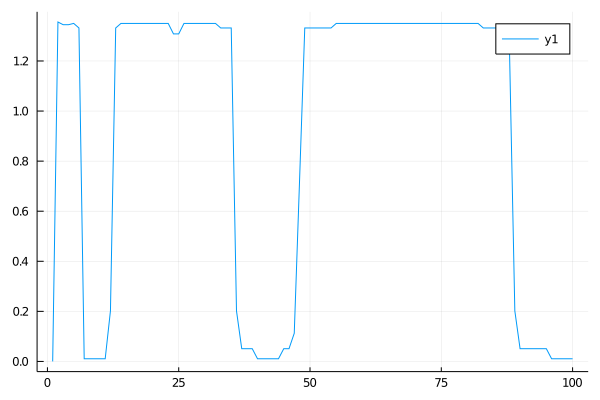

In [39]:
plot([norm(allY[trunc(Int, i), 1:end] - allY[1, 1:end]) for i=1:100])

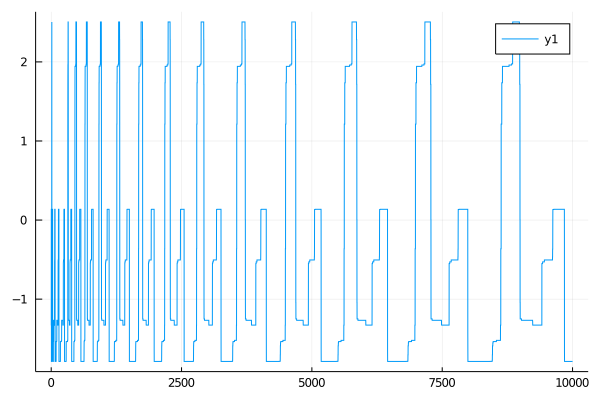

In [57]:
plot(allX)

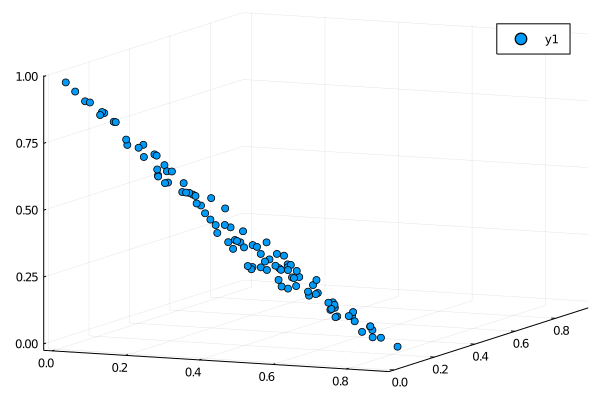

In [60]:
scatter(APV[1:end, 1], APV[1:end, 2], APV[1:end, 3])

In [16]:
using Plotly, WebIO
# data = [
#     "x" => APV[1:end, 1],
#     "y" => APV[1:end, 2], 
#     "z" => APV[1:end, 3],
# "mode" => "markers",
#   "marker" => [
#     "color" => "rgb(127, 127, 127)",
#     "size" => 12,
#     "symbol" => "circle",
#     "opacity" => 0.9
#   ],
#   "type" => "scatter3d"
# ]

Plotly.plot([APV[1:end, 1], APV[1:end, 2], APV[1:end, 3])

LoadError: MethodError: no method matching Plot(::Array{Array{Float64,1},1})
Closest candidates are:
  Plot(::AbstractArray{T,1}, !Matched::AbstractArray{T,2} where T) where T<:(AbstractArray{T,1} where T) at /Users/aamalhussain/.julia/packages/PlotlyBase/NxSlF/src/convenience_api.jl:30
  Plot(::AbstractArray{T,1}, !Matched::AbstractArray{T,2} where T, !Matched::Layout; style, kwargs...) where T<:(AbstractArray{T,1} where T) at /Users/aamalhussain/.julia/packages/PlotlyBase/NxSlF/src/convenience_api.jl:30
  Plot(; style) at /Users/aamalhussain/.julia/packages/PlotlyBase/NxSlF/src/PlotlyBase.jl:56
  ...